# Анализ игровой индустрии

## Информация проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных из файла

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод:
* В столбце `name`  - пропуски;
* В столбце `Year_of_Release` - пропуски и неправильный формат;
* В столбце `Genre` - пропуски;
* В столбце `Critic_Score` - пропуски;
* В столбце `User_Score` - пропуски и неправильный формат;
* В столбце `Rating` - пропуски;

## Подготовка данных

### Замена названия столбцов

In [5]:
data.columns = [
    "name",
    "platform",
    "year_of_release",
    "genre",
    "na_sales",
    "eu_sales",
    "jp_sales",
    "other_sales",
    "critic_score",
    "user_score",
    "rating"
]

### Проверка явных дубликатов

In [6]:
data.duplicated().sum()

0

### Обработка пропусков

#### Информация об пропусках

In [7]:
print('Количество пропусков в столбце Name:', data["name"].isna().sum())
print('Процент пропусков в столбце Name:', data["name"].isna().sum()/len(data["platform"])*100)

Количество пропусков в столбце Name: 2
Процент пропусков в столбце Name: 0.011965300628178284


In [8]:
print('Количество пропусков в столбце Year_of_Release:', data["year_of_release"].isna().sum())
print('Процент пропусков в столбце Year_of_Release:', data["year_of_release"].isna().sum()/len(data["platform"])*100)

Количество пропусков в столбце Year_of_Release: 269
Процент пропусков в столбце Year_of_Release: 1.609332934489979


In [9]:
print('Количество пропусков в столбце Genre:', data["genre"].isna().sum())
print('Процент пропусков в столбце Genre:', data["genre"].isna().sum()/len(data["platform"])*100)

Количество пропусков в столбце Genre: 2
Процент пропусков в столбце Genre: 0.011965300628178284


In [10]:
print('Количество пропусков в столбце Critic_Score:', data["critic_score"].isna().sum())
print('Процент пропусков в столбце Critic_Score:', data["critic_score"].isna().sum()/len(data["platform"])*100)

Количество пропусков в столбце Critic_Score: 8578
Процент пропусков в столбце Critic_Score: 51.31917439425665


In [11]:
print('Количество пропусков в столбце User_Score:', data["user_score"].isna().sum())
print('Процент пропусков в столбце User_Score:', data["user_score"].isna().sum()/len(data["platform"])*100)

Количество пропусков в столбце User_Score: 6701
Процент пропусков в столбце User_Score: 40.08973975471134


In [12]:
print('Количество пропусков в столбце Rating:', data["rating"].isna().sum())
print('Процент пропусков в столбце Rating:', data["rating"].isna().sum()/len(data["platform"])*100)

Количество пропусков в столбце Rating: 6766
Процент пропусков в столбце Rating: 40.478612025127134


In [13]:
data.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

#### Обработка столбцов `name` и `genre`

In [14]:
data[data["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как видно из таблицы, то данные заполнить нет возможности, тем более в таких строках очень много пропусков. Можно удлать данные строки

In [15]:
data.dropna(subset= ["name"], inplace = True)

In [16]:
data["name"].isna().sum()

0

#### Обработка столбца `Year_of_Release`

In [17]:
data[data["year_of_release"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Рассмотрим несколько игр для примера поближе

In [18]:
data[data['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [19]:
data[data['name'] == 'LEGO Batman: The Videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [20]:
data[data['name'] == 'FIFA Soccer 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [21]:
data[data['name'] == 'wwe Smackdown vs. Raw 2006']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN


Для некоторых игр дату можно заоплнить на основании даты выхода на другой платформе, но есть и игры, у которых релиз был только на одной платформе. Такие игры оставим с пропусками.

In [22]:
for i in data[data["year_of_release"].isna()].index:
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()

In [23]:
data["year_of_release"] = data["year_of_release"].fillna(-1) #Заменим пустые значения на -1 для дальнейшего анализа
data["year_of_release"] = data["year_of_release"].astype("int")

#### Обработка столбца `rating`

Пропущенные данные невозможно заполнить, так как отсутствует связь. Данные пропуски отсутствуют в результате того, что скорей всего на тот момент не было организации (Появилась только в 1994 году) или не осуществялала оценку игр из определенных регионов

In [24]:
data[(data["rating"].isna() == True) & (data["year_of_release"] <= 1994)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15998,Jet Impulse,DS,-1,Simulation,0.00,0.00,0.02,0.00,NaN,NaN,NaN
16079,Football Manager 2007,X360,-1,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16207,Rock N' Roll Racing,SNES,1993,Racing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16348,Agarest Senki: Re-appearance,PS3,-1,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN


546 строк и играми, которые были выпущены раньше 1994 года и не были оценены организацией.

In [25]:
data[(data["rating"].isna() == True) & (data["na_sales"] == 0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.0,0.00,4.87,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009,Misc,0.0,0.00,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013,Role-Playing,0.0,0.00,3.44,0.00,NaN,NaN,NaN
403,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,0.0,0.99,2.32,0.02,NaN,NaN,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,0.0,0.00,3.19,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.0,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.0,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.0,0.00,0.01,0.00,NaN,NaN,NaN


Также очень много случаев, когда игра была выпущена только на Японком и Европейском рынке. В связи с тем, что ESRB оценивают игры только в Америке и Канаде, то такие игры не получили оценку.

In [26]:
data["rating"].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [27]:
data["rating"].fillna("Рейтинг не назначен", inplace= True)

In [28]:
data["rating"].value_counts()

Рейтинг не назначен    6764
E                      3990
T                      2961
M                      1563
E10+                   1420
EC                        8
K-A                       3
RP                        3
AO                        1
Name: rating, dtype: int64

#### Обработка столбца `User_Score` 

In [29]:
data["user_score"].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1         2
0.3       2
1.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

В таблице более 2000 случаев, когда указано - `tbd`. В связи с тем, что tbd означает - рейтинг будет скоро выставлен или когда мало оценок, то tbt приравнивается к NaN. Поэтому пропуски и tbd заменим на -1 для дальнейшего анализа.

In [30]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'].fillna(-1,inplace=True)
data["user_score"] = data["user_score"].astype('float')

#### Обработка столбца `Critic_Score`

In [31]:
data["critic_score"].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

In [32]:
data['critic_score'].fillna(-1,inplace=True)

In [33]:
data["critic_score"].value_counts()

-1.0     8576
 70.0     256
 71.0     254
 75.0     245
 78.0     240
         ... 
 29.0       3
 22.0       1
 13.0       1
 21.0       1
 17.0       1
Name: critic_score, Length: 83, dtype: int64

### Добавление суммарных продаж

In [34]:
data["total_sales"] = data["na_sales"] + data["eu_sales"] + data["jp_sales"] + data["other_sales"]

## Анализ данных

### Количество выпущенных игр по годам

<AxesSubplot:xlabel='year_of_release'>

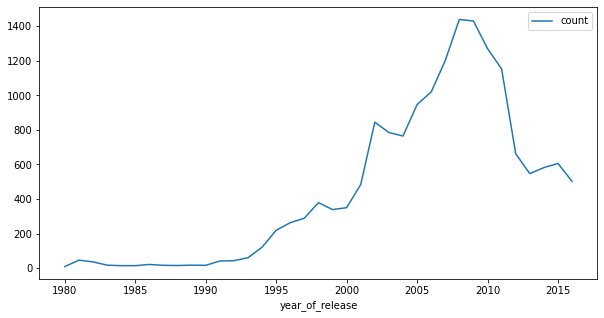

In [35]:
data_year = data.query('year_of_release != -1')
year_pivot = data_year.pivot_table(index = "year_of_release", values = "total_sales", aggfunc = "count")
year_pivot.columns = ["count"]
year_pivot.plot(figsize = (10,5))

Исходя из графика, можно сделать вывод что до 1994-1995 года количесвто выпущенных игр минимально. Это связано с тем, что на тот момент компьютеры и техника не были настолько мощно, как сейчас. Ну и игровая индустрия только начала свое зарождение. После 1994 года начался рост игр. Пик наблюдается в 2008-2009 году. Дальше начался спад. Такой спад можно объянсть тем, что скорей всего начался рост мобильных игр.

### Продажи по платформам

In [36]:
platform_pivot = data.pivot_table(index = "platform", values = "total_sales", aggfunc = "sum").sort_values(by = "total_sales", ascending = False)
platform_pivot.columns = ["sum"]
platform_pivot.head(10)

,sum
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


<AxesSubplot:xlabel='platform', ylabel='sum'>

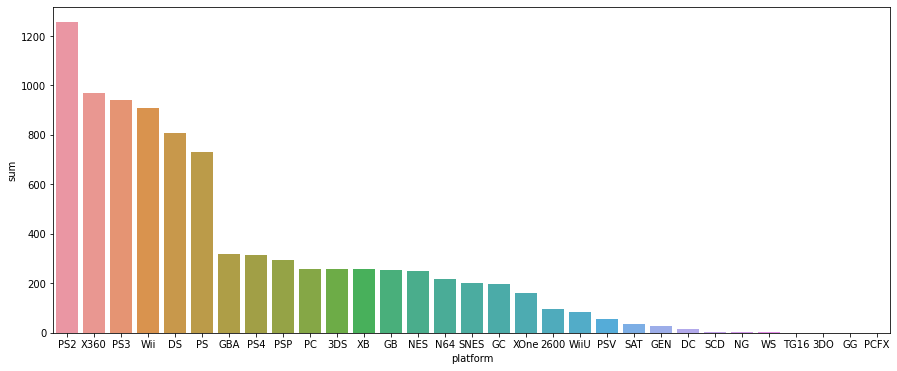

In [37]:
plt.figure(figsize=(15,6))
sns.barplot(x = platform_pivot.index,y="sum", data=platform_pivot)

По графику можно выделать топ5 платформ:
1. PS2
2. X360
3. Wii
4. PS3
5. DS

### Продолжительность жизни платформы

In [38]:
platforms_list = data['platform'].unique()

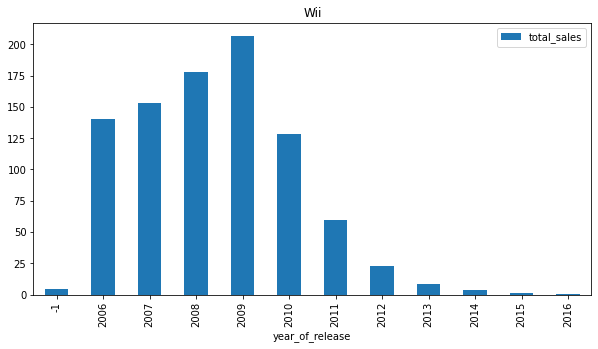

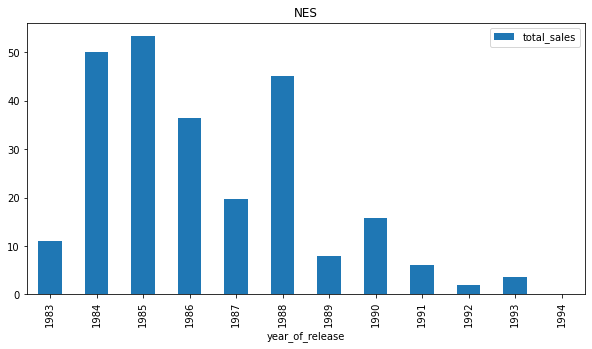

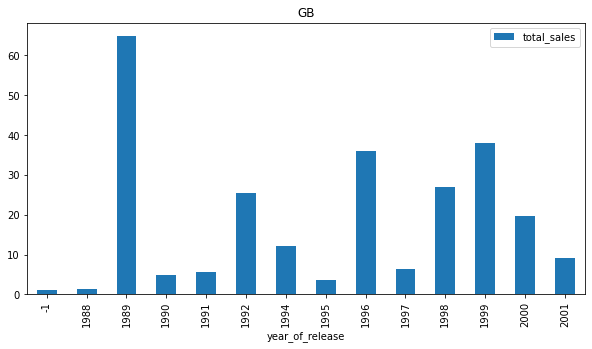

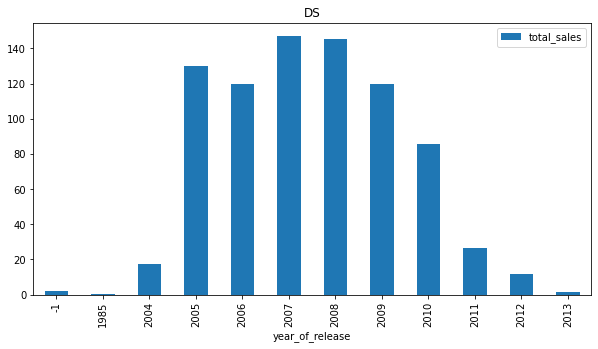

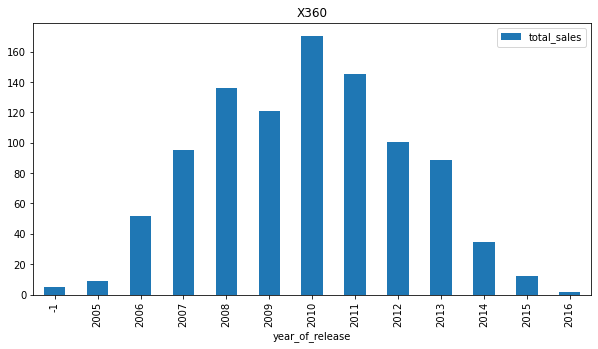

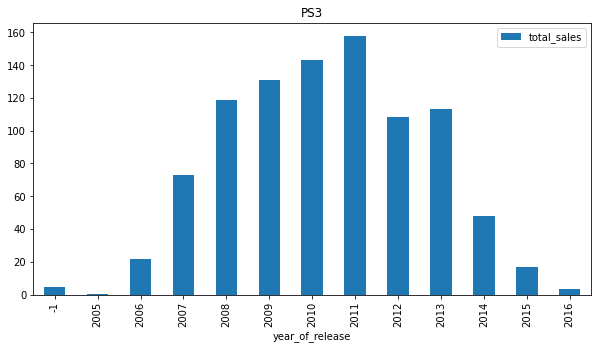

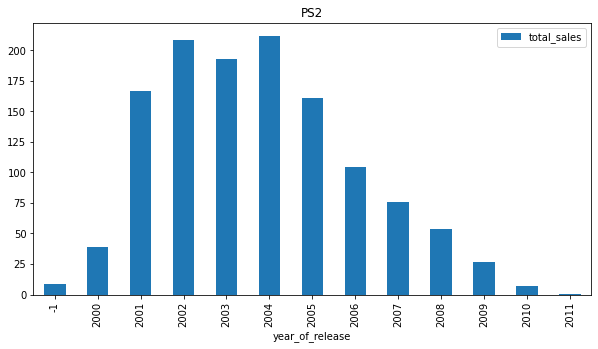

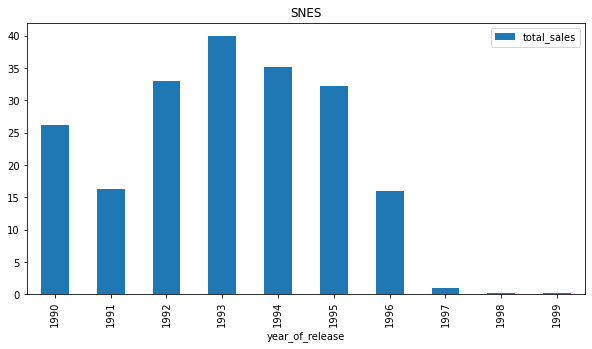

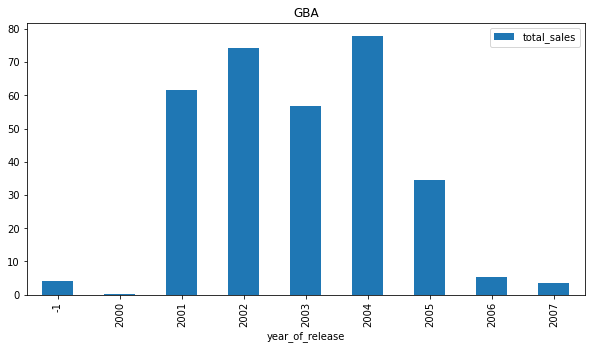

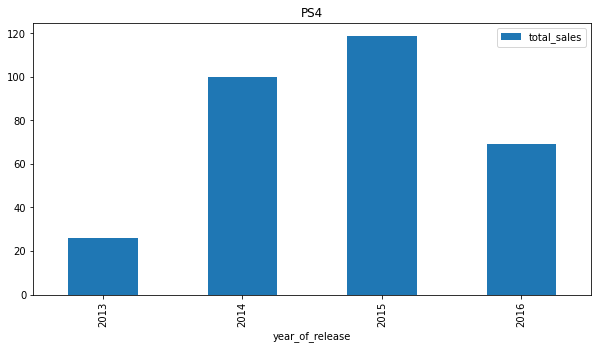

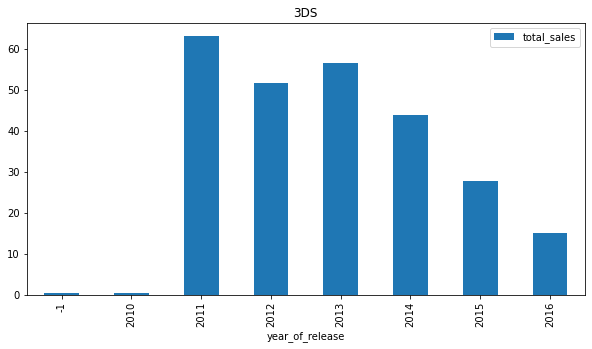

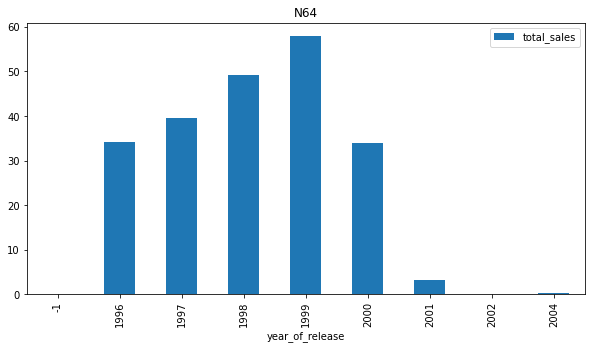

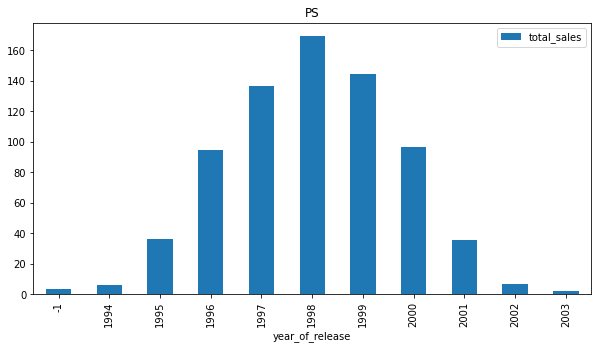

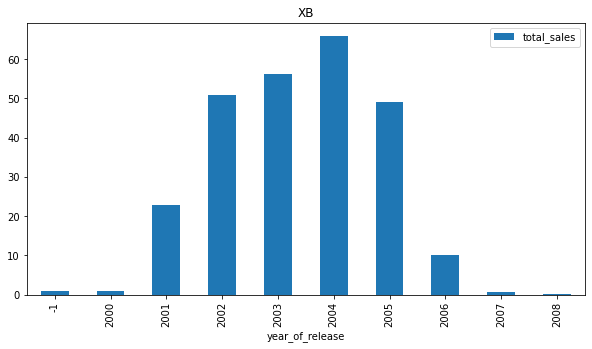

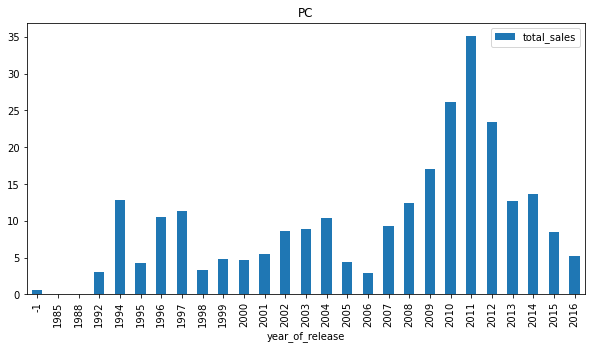

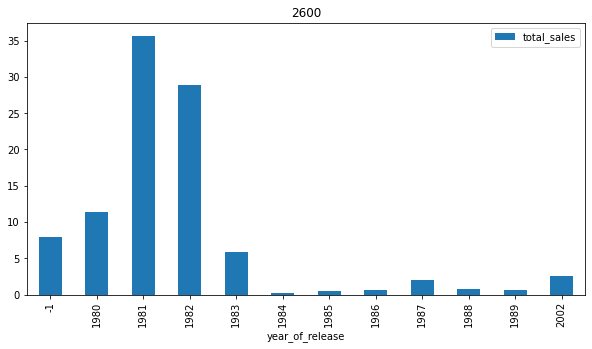

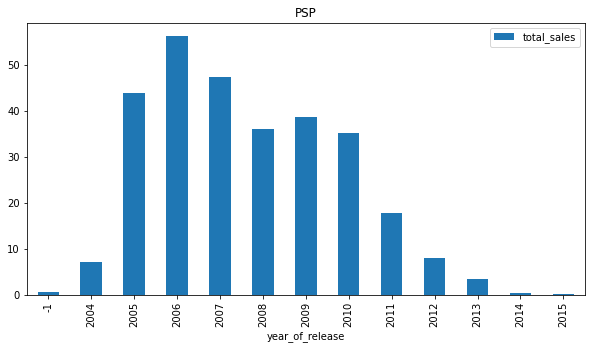

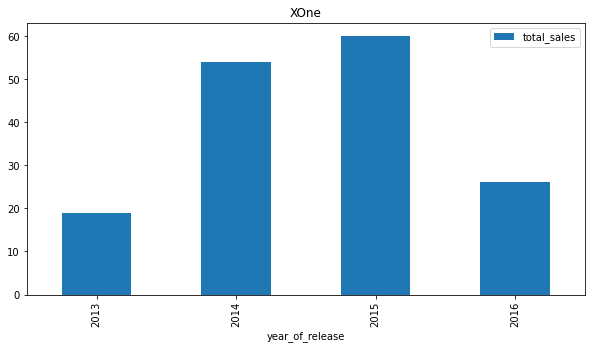

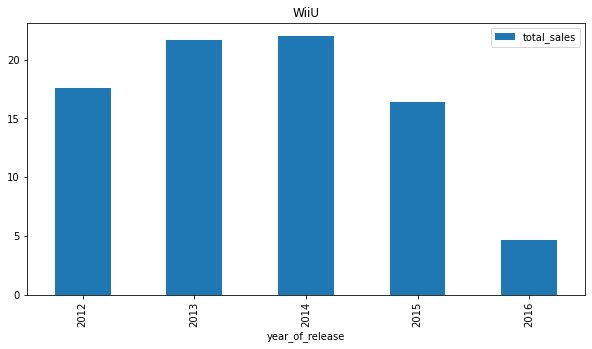

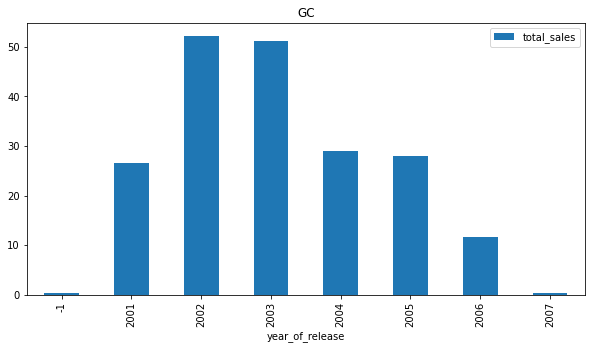

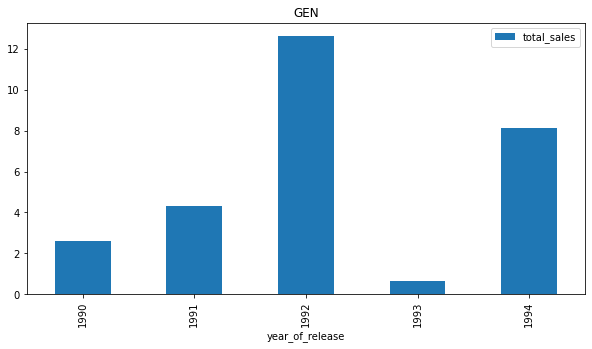

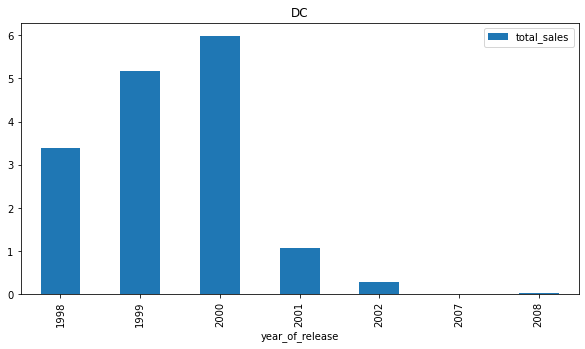

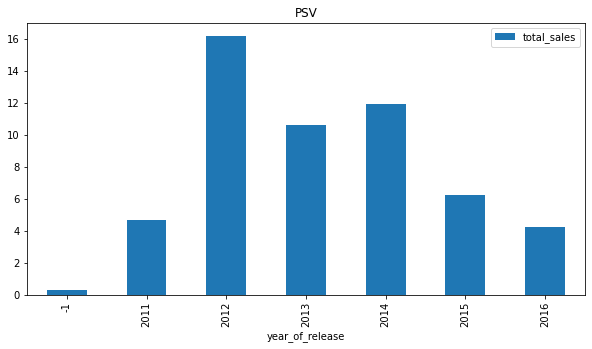

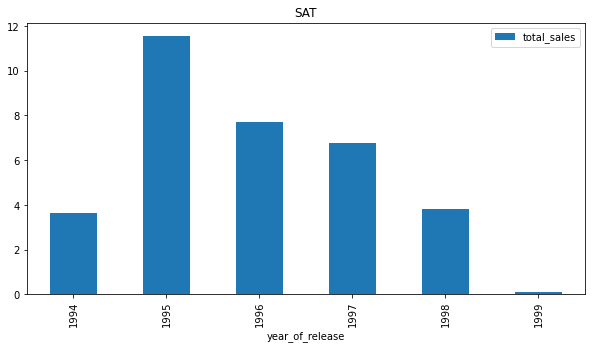

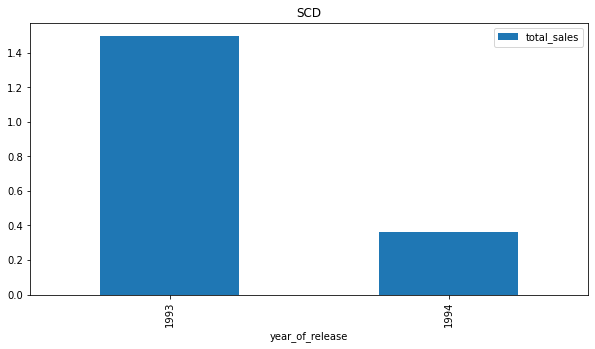

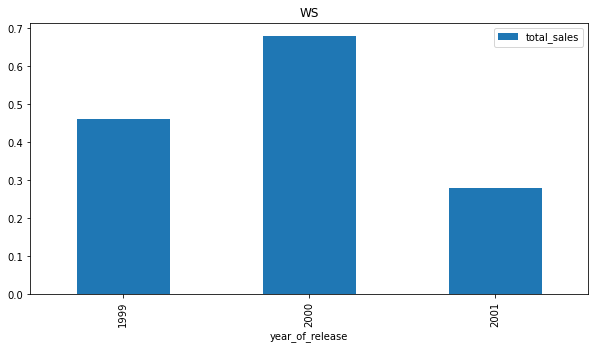

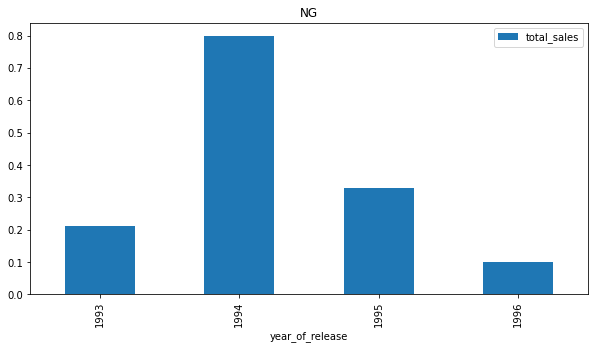

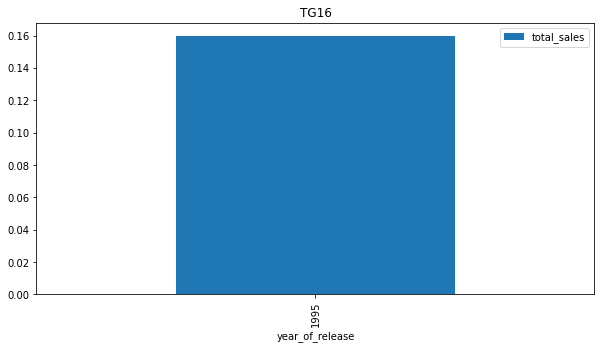

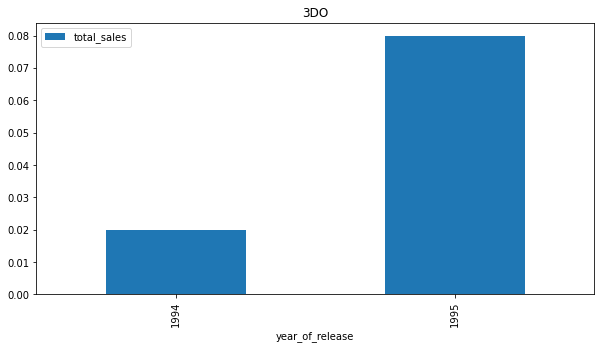

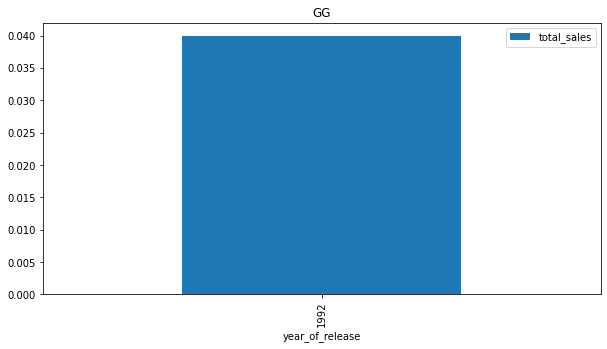

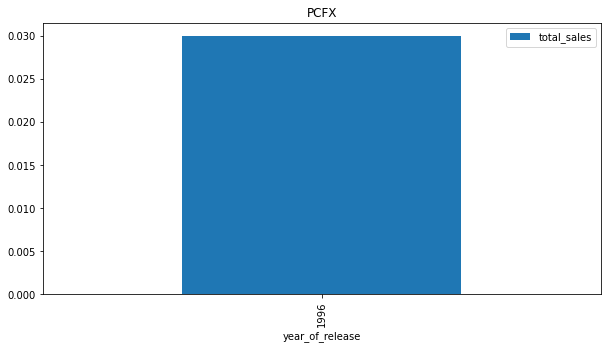

In [39]:
for platform in platforms_list:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(10,5))
    plt.title(platform)

Исходя из графиков, то средняя продолжитльеность жизни платформы составляет около 8 лет. Исключением является PC, так как данная платформа будет всегда актулаьно в свзяи с достпуностью и легкой заменой комплектующих на более новые и различной стоимостью от самых дешевых до самых дорогих.

#### Вывод:
* Для постройки прогноза необходимо брать наиболее актуальные данные, которые будут актульны для 2017 года. Поэтому в качестве временного интервала можно взять период с 2013 года. Именно в этом году вышли ноывые консоли, такие как PS4, XBOne, WiiU. Именно из-за этого продажи по прошлым поколениям консолей резко стали падать.

### Актуализация информации

In [40]:
actual_data = data.query("year_of_release > 2012")

И выберем наиболее преспективыне платформы, которые смогут принести дальнейшую прибыль. В нашем случаи это платформы нового поколения.

In [41]:
actual_data = actual_data.query('platform in ["PS4","XOne","PC","WiiU","3DS", "PSV"]')

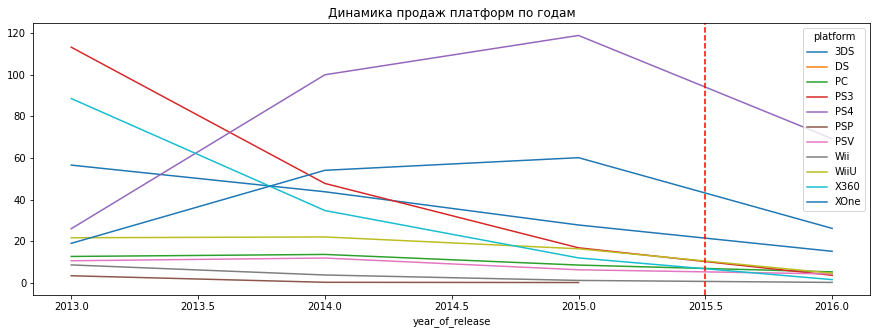

In [71]:
#Код ревьюера
data.query("year_of_release >= 2013").pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')\
  .plot(figsize = (15, 5), title = 'Динамика продаж платформ по годам')
plt.axvline(x = 2015.5 , color = 'r', linestyle = 'dashed')
plt.show()

In [42]:
actual_data.groupby("platform")["total_sales"].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.04,0.09,0.280,14.60
PC,192.0,0.208646,0.349801,0.01,0.03,0.08,0.230,3.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
PSV,358.0,0.092151,0.153816,0.01,0.02,0.04,0.110,1.96
WiiU,115.0,0.562000,1.038778,0.01,0.06,0.20,0.595,7.09
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


(0.0, 2.0)

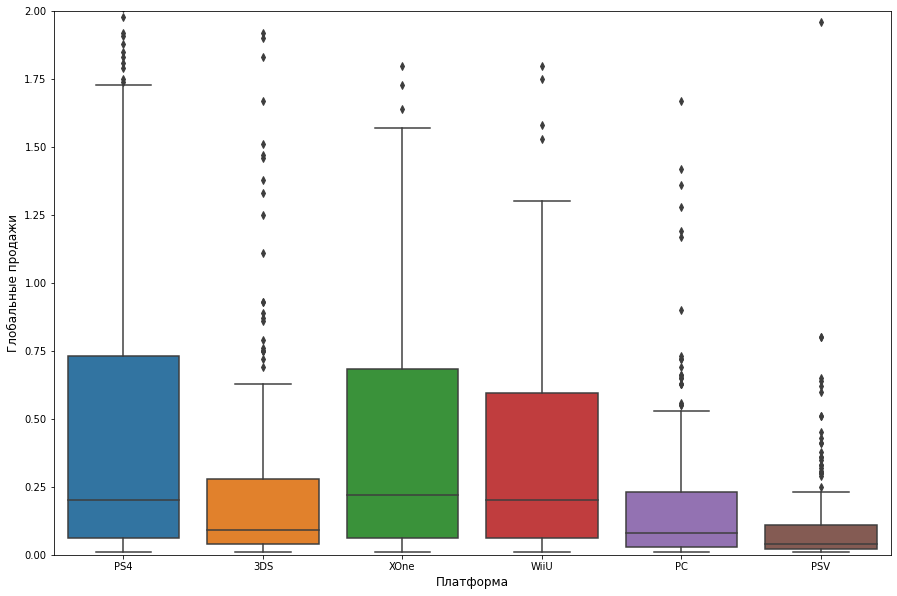

In [43]:
plt.figure(figsize=(15,10))
sns.boxplot(data=actual_data, x='platform', y='total_sales')
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0,2)

- Лидерами среди продаж можнл выделить PS4. После этого на ровне идут Xone и WiiU. Небольшое отстование XOne от PS4 обусловлено тем, что X360 еще пользовался популярностью среди игроков и они не хотели переходить на новую платформу. 
- Хуже всего дела у PSV (Playstation vita). Данная платформа так и не получила широкое признание среди игроков в дальнейшем.
- PC сильно уступил консолям и перешел на второй план.

### Влияние отзывов пользователей и критиков на продажи популярной платформы.

В прошлом пункте было выявлено, что наиболее популярной платформой является PS4.

In [44]:
ps4_data = actual_data.query('platform == "PS4"')

Сразу отбросим пустые значения в оценкак критиков и пользователей, которые были заменены на -1

In [45]:
ps4_data = ps4_data.query('(critic_score != -1) and (user_score != -1)')

In [46]:
ps4_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Посмотрим на корреляцию между оценкой критиков и продажами

In [47]:
ps4_data["total_sales"].corr(ps4_data["critic_score"])

0.40589480145836687

Text(0.5, 1.0, 'Оценка критиков')

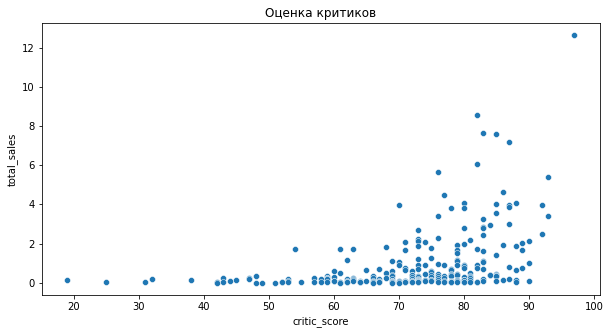

In [48]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data)
plt.title('Оценка критиков')

Посмотрим на корреляцию между оценкой пользователями и продажами

In [49]:
ps4_data["total_sales"].corr(ps4_data["user_score"])

-0.03362497596528878

Text(0.5, 1.0, 'Оценка пользователей')

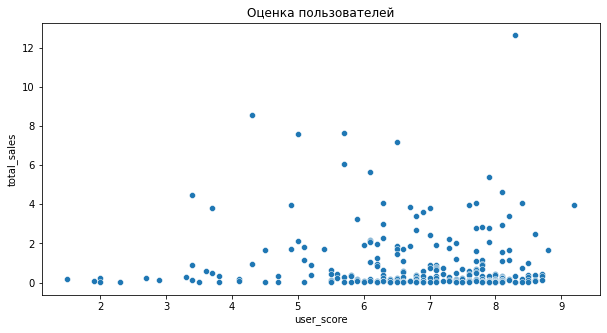

In [50]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data)
plt.title('Оценка пользователей')

#### Вывод:
- Корреляции между оценкой пользователей и продажами не наблюдается
- Корреляция между оценкой критиков и продажми равняется 0,4. Среднняя зависимоть. И как наблюдается по графику - чем выше оценка критиков, тем больше продаж наблюдается

### Влияние отзывов пользователей и критиков на продажи остальных платформ.

In [51]:
other_platforms = actual_data.query('(platform != "PS4") and (critic_score != -1) and (user_score != -1)')

In [52]:
def cor(name):
    platform_analyse = other_platforms.query('platform == @name')
    x = platform_analyse["total_sales"].corr(platform_analyse["user_score"])
    y = platform_analyse["total_sales"].corr(platform_analyse["critic_score"])
    print(f"Корреляция между продажами и оценкой пользователей для {name}:",x)
    print(f"Корреляция между продажами и оценкой критиков для {name}:",y)
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform_analyse, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform_analyse, ax=ax[1])
    fig.suptitle(name, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()

Корреляция между продажами и оценкой пользователей для XOne: -0.09400318326920852
Корреляция между продажами и оценкой критиков для XOne: 0.4104220356129637


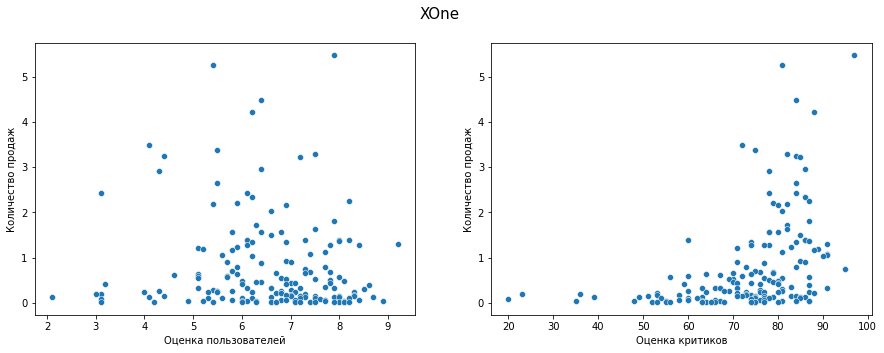

Корреляция между продажами и оценкой пользователей для PC: -0.10522787365279426
Корреляция между продажами и оценкой критиков для PC: 0.1977898633499024


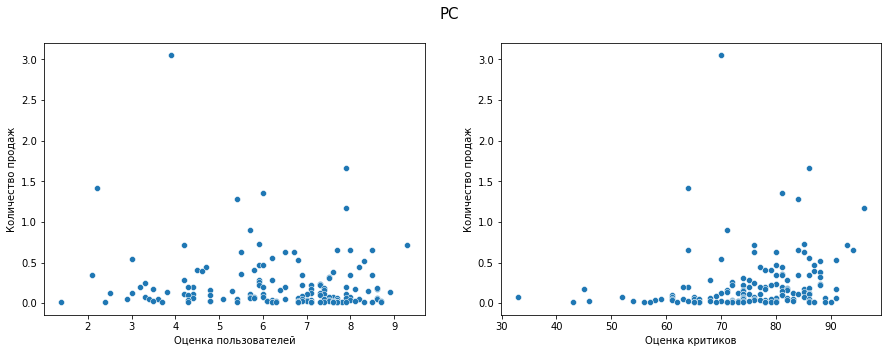

Корреляция между продажами и оценкой пользователей для WiiU: 0.4086917438492647
Корреляция между продажами и оценкой критиков для WiiU: 0.37950449899784144


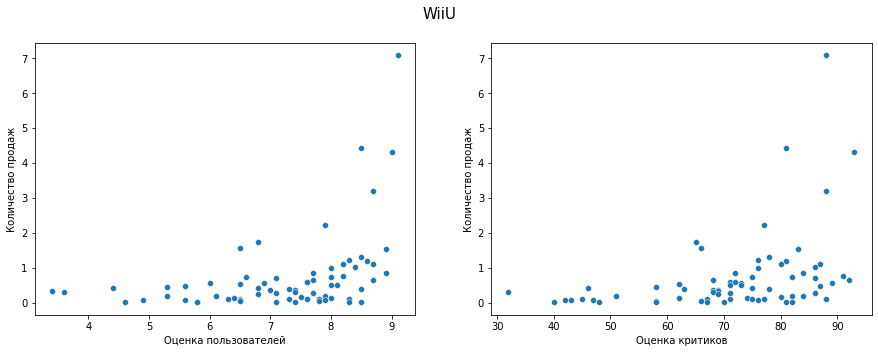

Корреляция между продажами и оценкой пользователей для 3DS: 0.2729904366942444
Корреляция между продажами и оценкой критиков для 3DS: 0.33923492878531464


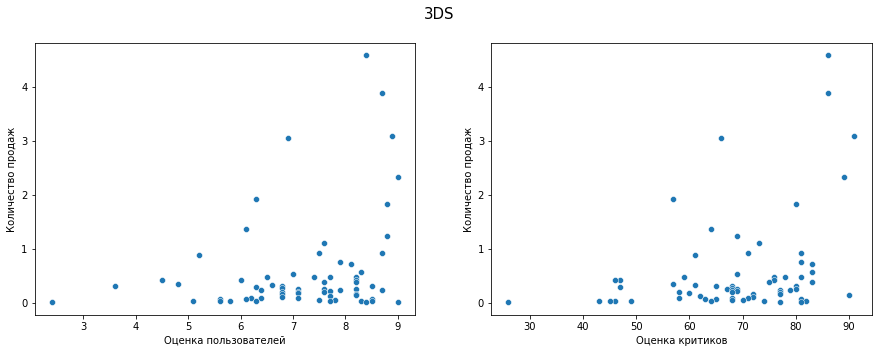

Корреляция между продажами и оценкой пользователей для PSV: 0.2654782720509426
Корреляция между продажами и оценкой критиков для PSV: 0.2540997021864078


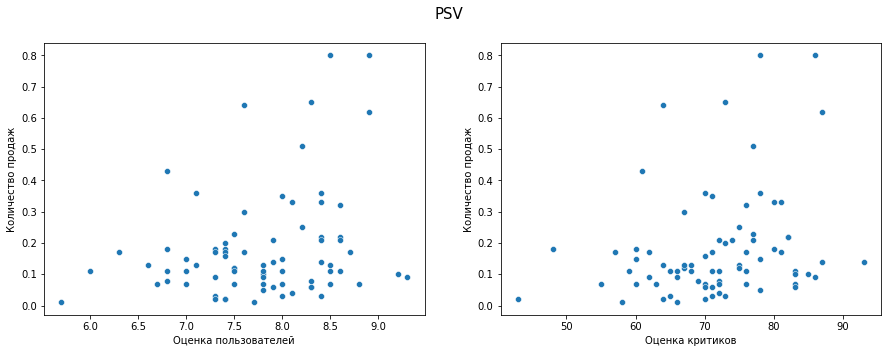

In [53]:
for name in ["XOne","PC","WiiU","3DS", "PSV"]:
    cor(name)

Вывод:
- Из полученной информации, можно сказать, что для других платформ идет такой же принцип, как и для `PS4`. Чем выше оценка критиков, тем больше продаж. Оценки пользователей не влияют на продажи
- Однако есть исключения. Игроки, пользующиеся консолями Nintendo (WiiU и 3DS) прислушиваются к оценкам пользователей на ровне с оценками критиков

### Распределение игр по жанрам

In [54]:
genre_data_sum = actual_data.pivot_table(index ="genre", values = "total_sales", aggfunc = "sum").sort_values(by="total_sales",ascending = False)
genre_data_sum.columns = ["sum"]
genre_data_sum

,sum
genre,
Action,199.81
Shooter,165.71
Role-Playing,123.94
Sports,90.67
Misc,34.66
Platform,34.22
Racing,30.36
Fighting,26.69
Simulation,19.81


<AxesSubplot:xlabel='genre', ylabel='sum'>

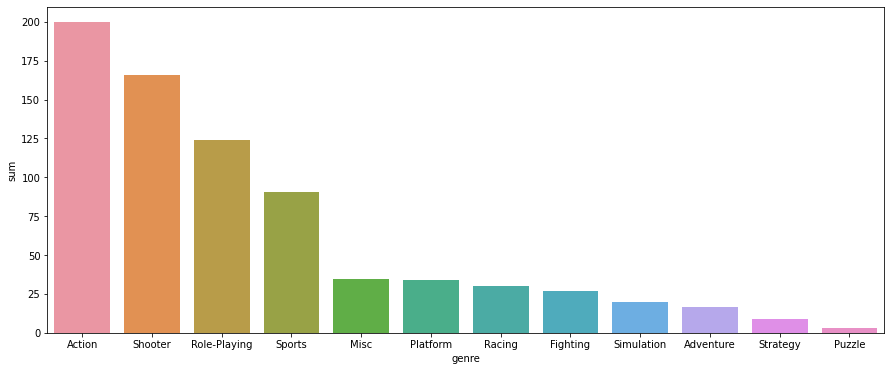

In [55]:
plt.figure(figsize=(15,6))
sns.barplot(x =genre_data_sum.index ,y="sum", data=genre_data_sum)

#### Вывод:
- Наиболее популярным жанром является `Action`
- Наименее популярным игры в жанре `Puzzle`. Пазлы особо никогда не пользовались популярностью среди игроков, что подтверилолсь графиком.

<AxesSubplot:xlabel='genre', ylabel='median'>

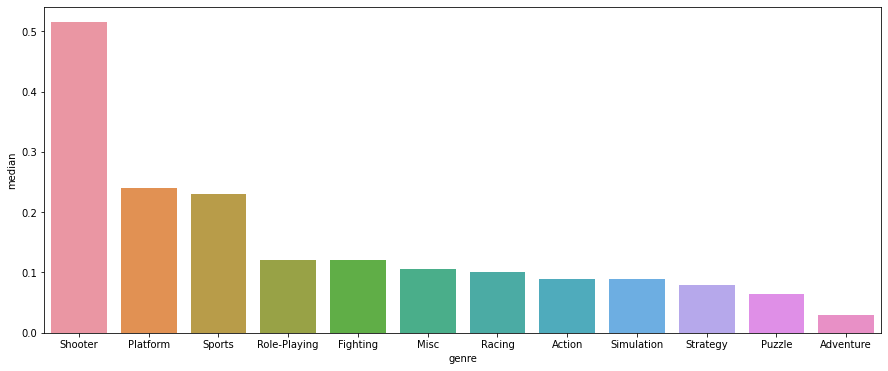

In [56]:
genre_data_median = actual_data.pivot_table(index ="genre", values = "total_sales", aggfunc = "median").sort_values(by="total_sales",ascending = False)
genre_data_median.columns = ["median"]
genre_data_median

plt.figure(figsize=(15,6))
sns.barplot(x =genre_data_median.index ,y="median", data=genre_data_median)

#### Вывод:
- По медианным значениям картина сильно поменялась. Наиболее стабильно и больше всего приносит жанр - `Shooter`. А вот хуже всего `Adventure`. 
- По общим продажам хоть `Action` занимает первое место, но вот по стабильности приноса дохода чуть ли не на последних местах.

## Портрет пользователя каждого региона

Расшифровка рейтинга:
* E - от 6 лет
* E10+ - от 10 лет
* T - от 13 лет
* M - от 17 лет

In [57]:
jp_data_platform = actual_data.pivot_table(index = 'platform',values = 'jp_sales',aggfunc="sum").sort_values(by='jp_sales',ascending = False)
jp_data_platform.columns= ['sales']
na_data_platform = actual_data.pivot_table(index = 'platform',values = 'na_sales',aggfunc="sum").sort_values(by='na_sales',ascending = False)
na_data_platform.columns= ['sales']
eu_data_platform = actual_data.pivot_table(index = 'platform',values = 'eu_sales',aggfunc="sum").sort_values(by='eu_sales',ascending = False)
eu_data_platform.columns= ['sales']

In [58]:
jp_data_genre = actual_data.pivot_table(index = 'genre',values = 'jp_sales',aggfunc="sum").sort_values(by='jp_sales',ascending = False)
jp_data_genre.columns= ['sales']
na_data_genre = actual_data.pivot_table(index = 'genre',values = 'na_sales',aggfunc="sum").sort_values(by='na_sales',ascending = False)
na_data_genre.columns= ['sales']
eu_data_genre = actual_data.pivot_table(index = 'genre',values = 'eu_sales',aggfunc="sum").sort_values(by='eu_sales',ascending = False)
eu_data_genre.columns= ['sales']

In [59]:
jp_data_rating = actual_data.pivot_table(index = 'rating',values = 'jp_sales',aggfunc="sum").sort_values(by='jp_sales',ascending = False)
jp_data_rating.columns= ['sales']
na_data_rating = actual_data.pivot_table(index = 'rating',values = 'na_sales',aggfunc="sum").sort_values(by='na_sales',ascending = False)
na_data_rating.columns= ['sales']
eu_data_rating = actual_data.pivot_table(index = 'rating',values = 'eu_sales',aggfunc="sum").sort_values(by='eu_sales',ascending = False)
eu_data_rating.columns= ['sales']

### Япония

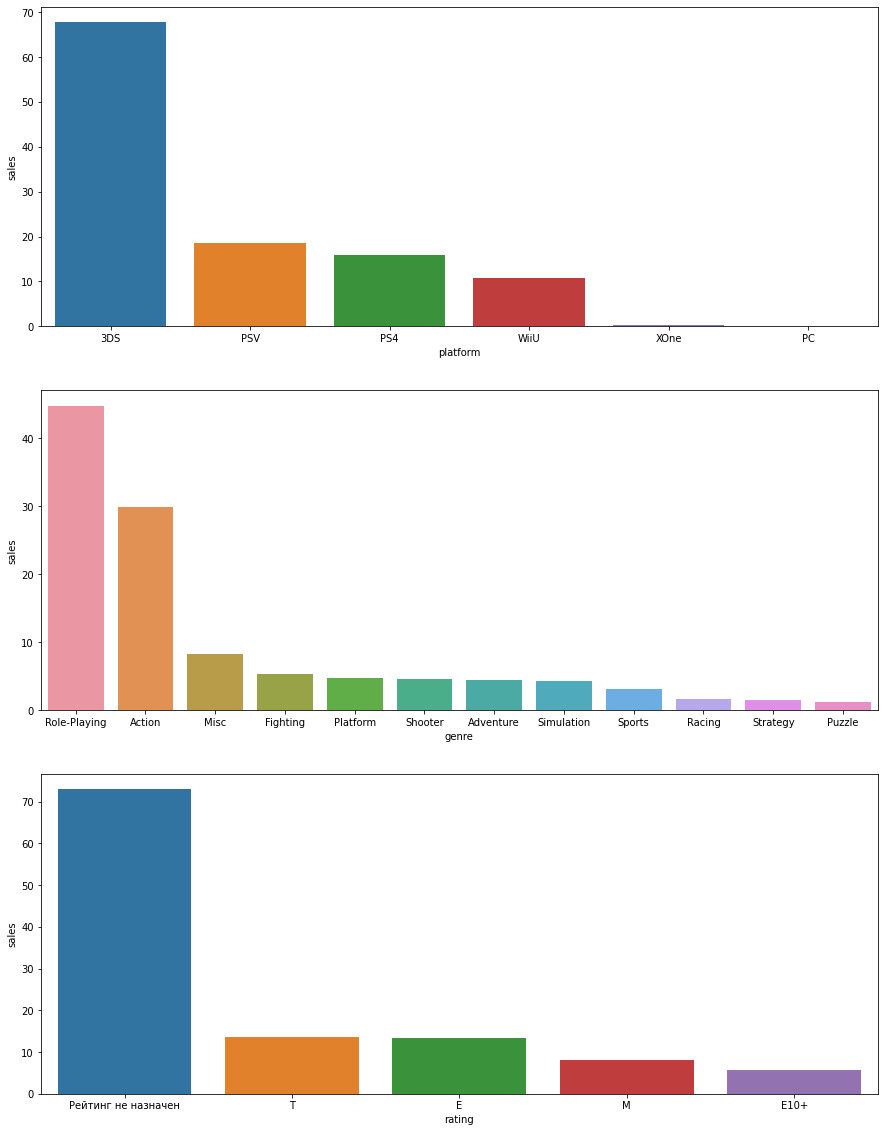

In [60]:
fig, ax = plt.subplots(3, figsize=(15,20))
sns.barplot(x =jp_data_platform.index ,y="sales", data=jp_data_platform, ax=ax[0])
sns.barplot(x =jp_data_genre.index ,y="sales", data=jp_data_genre, ax=ax[1])
sns.barplot(x =jp_data_rating.index ,y="sales", data=jp_data_rating, ax=ax[2])
plt.show()

### Северная Америка

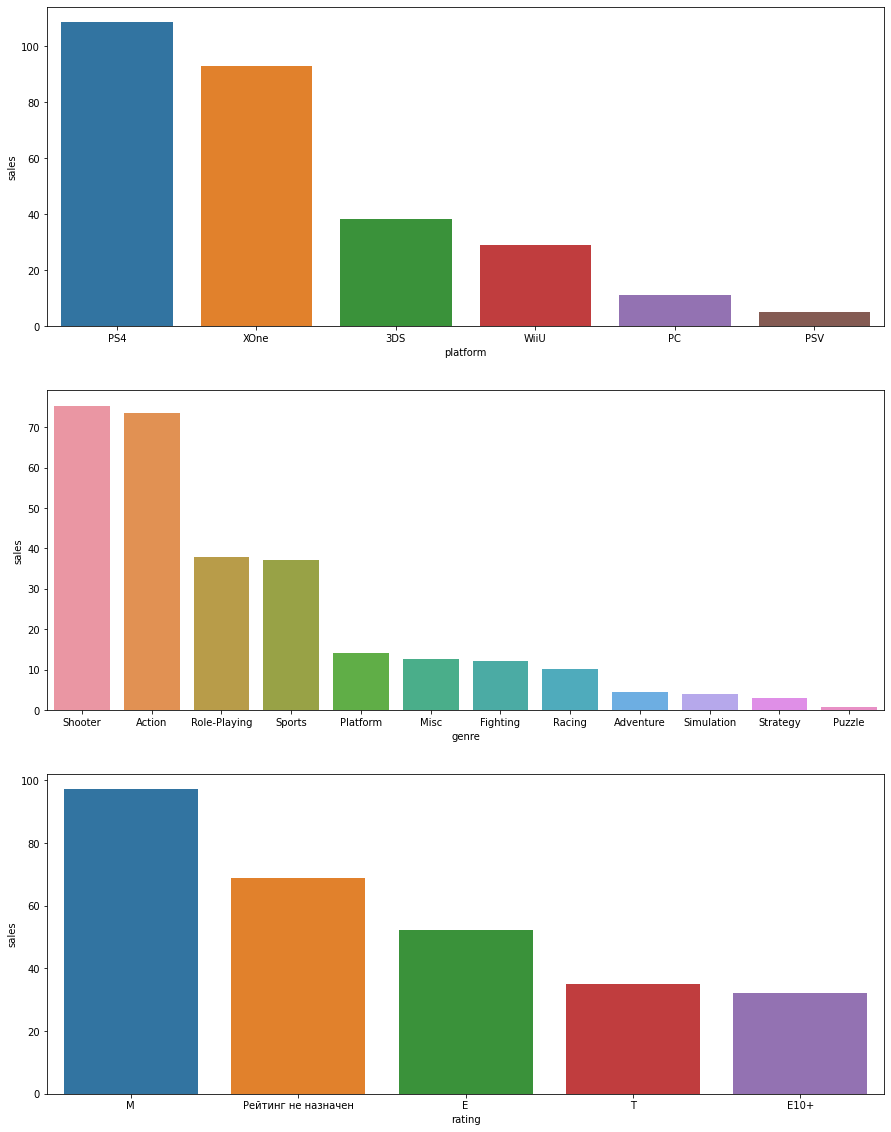

In [61]:
fig, ax = plt.subplots(3, figsize=(15,20))
sns.barplot(x = na_data_platform.index ,y="sales", data=na_data_platform, ax=ax[0])
sns.barplot(x =na_data_genre.index ,y="sales", data=na_data_genre, ax=ax[1])
sns.barplot(x =na_data_rating.index ,y="sales", data=na_data_rating, ax=ax[2])
plt.show()

### Европа

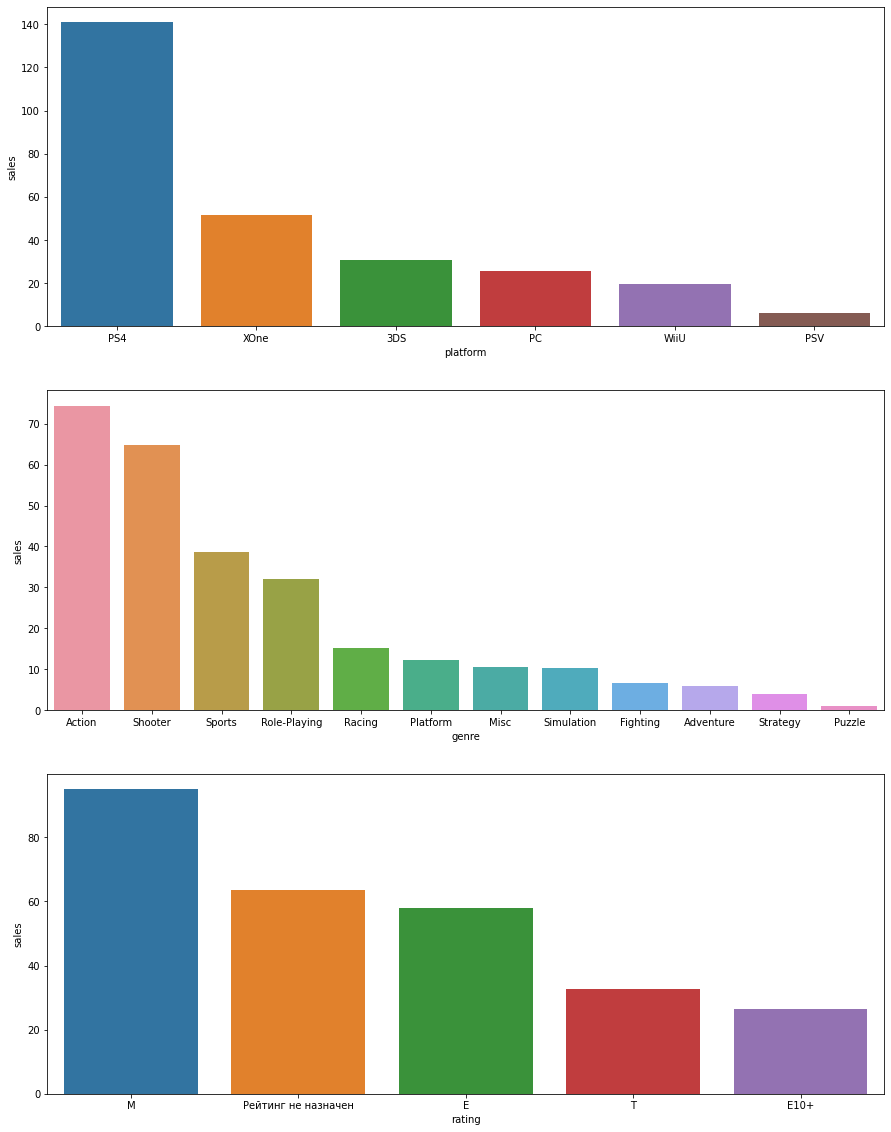

In [62]:
fig, ax = plt.subplots(3, figsize=(15,20))
sns.barplot(x =eu_data_platform.index ,y="sales", data=eu_data_platform, ax=ax[0])
sns.barplot(x =eu_data_genre.index ,y="sales", data=eu_data_genre, ax=ax[1])
sns.barplot(x =eu_data_rating.index ,y="sales", data=eu_data_rating, ax=ax[2])
plt.show()

### Вывод:
Япония:
* ТОП-5 платформ для Японского рынка выглядит следующим образом: `3DS`, `PSV`, `PS4`, `WiiU`, `XOne`. Можно заметить, что японцы больше всего предпочитают платформы, котоыре были созданы в Японии. 
* По жанрам на Японском рынке лидирует `Role-Playing` игры. Далее следует `Action` с половиной отрыва от топ-1. Остальные позиции заняли `misc`, `fighting`, `platform`.
* По рейтингу очень много позиций, где не было присвоен рейтинг игре. В итоге топ-4 в Японии выглядит следующим образом: `T`, `E`, `M`, `E10+`

Северная Америка:
Ситуация от Японского рынка сильно отличается.
* ТОП-5 платформ для Американского рынка выглядит следующим образом: `PS4`,`XOne`, `3DS`, `WiiU`,  `PC`;
* ТОП-5 жанров: `shooter`, `action`, `Role-Playing`, `sports`, `platform`
* По рейтингу ТОП-5 следующий: `M`, `E`, `T`,`E10+`. На втром месте также много игр, у которых нет рейтинга.

Европа:
Для Европы ситуация схожа с Америкой.
* ТОП-5 платформ для Американского рынка выглядит следующим образом: `PS4`,`XOne`, `3DS`, `PC`, `WiiU`;
* ТОП-5 жанров: `action`, `shooter`, `sports`, `Role-Playing`, `racing`
* По рейтингу ТОП-5 следующий: `M`, `E`, `T`,`E10+`. Ничем не отличается от Американского

## Проверка гипотез

### Гипотеза №1

* H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* H1 - Средние пользовательские рейтинги платформ Xbox One и PC  различаются;

In [63]:
xbox_test = actual_data.query('(platform == "XOne") and (user_score != -1)')["user_score"]
pc_test = actual_data.query('(platform == "PC") and (user_score != -1)')["user_score"]
alpha = .05

results = st.ttest_ind(
    xbox_test, 
    pc_test, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16174359801784308
Не получилось отвергнуть нулевую гипотезу


In [64]:
pivot_xone_pc = actual_data.query('(platform == "XOne" or platform == "PC") and (user_score != -1)')
pivot_xone_pc.pivot_table(index = 'platform', values = 'user_score', aggfunc = "mean")

,user_score
platform,
PC,6.280380
XOne,6.521429


<AxesSubplot:xlabel='platform', ylabel='user_score'>

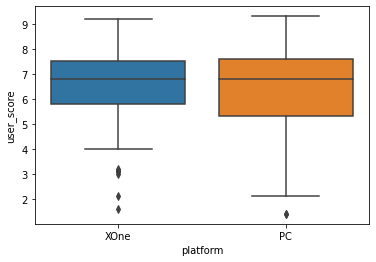

In [65]:
sns.boxplot(x='platform',y='user_score',data=pivot_xone_pc, orient='v')

#### Вывод:
 
Исходя из Т-теста, было выявлено, что средние оценки пользователей у `PC` и `XOne` одинаковые.

### Гипотеза №2

* H0 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые;
* H1 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются;

In [66]:
action_test = actual_data.query('(genre == "Action") and (user_score != -1)')["user_score"]
sport_test = actual_data.query('(genre == "Sports") and (user_score != -1)')["user_score"]
alpha = .05

results = st.ttest_ind(
    action_test, 
    sport_test, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.2481210261397359e-11
Отвергаем нулевую гипотезу


In [67]:
pivot_action_sport = actual_data.query('(genre == "Action" or genre == "Sports") and (user_score != -1)')
pivot_action_sport.pivot_table(index = 'genre', values = 'user_score', aggfunc = "mean")

,user_score
genre,
Action,6.890278
Sports,5.565347


<AxesSubplot:xlabel='genre', ylabel='user_score'>

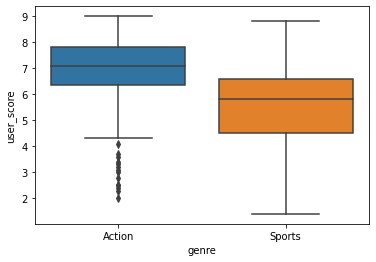

In [68]:
sns.boxplot(x='genre',y='user_score',data=pivot_action_sport, orient='v')

#### Вывод:
Средние пользовательские оценки почти в 1,2 раза больше у жанра экшена, чем у спорт. Скорей всего это связано с тем, что жанр спорт не так силильно популярен, чем экшен (из-за количества игроков).

## Общий вывод

* Был получен файл с данными и проанализирован на информацию в нем. В ходе анализа было выявлено, что в некоторых столбцах присутствуют пропуски и неправильный формат данных. А также неправильное название столбцов;
* На этапе подготовки данных, были приняты следующие шаги: сделаны в нижнем регистре название столбцов, заполнены пропуски в столбцах и приведен нужный формат данных. Добавлен новый столбец с суммой по всем регионам.
* На эиапе анализа данных, было выявлено следующее: историю игр можно разделить на несколько этапов. C 1980-1995 зарождение игр. С 1995-2007 рост популярности. 2008-2009 года пик популярности. С 2009 начался спад. При этом средняя продолжительность платформа составляет 8 лет, за исключением PC. Выявлены топ-5 платформ за все время 1. PS2 | 2. X360 | 3. Wii | 4. PS3 | 5. DS;
* Для построения прогноза на 2017 год был выбран период с 2013 года, так как именно в этом году появились новые платформы, а старые доживали свои дни. 
* Лидерами среди продаж с 2013 года можно выделить PS4. После этого на ровне идут Xone и WiiU. Хуже всего дела у PSV (Playstation vita). Данная платформа так и не получила широкое признание среди игроков в дальнейшем. А PC сильно уступил консолям и перешел на второй план.
* Далее проведен анализ на зависимость оценки пользователей и критиков на продажу игр. Данный анализ показал, что оценка критиков все же влияет на успешность продаж игр. Чем выше оценка, тем лучше продается. А вот оценки пользователей не влияют, за исключением WiiU и 3DS. Пользователи данных платформ на ровне прислушиваюся к другим пользователям и критикам.
* Стоит отметить, что популярным жанром среди игроков является Shooter. А вот adventure не пользуется спросом.
* При составлении портрета пользователя каждого региона было выявлено, что американский и европейский пользователь сильно не отличаются дргу от друга. В то время как у Японского пользователя все наооборот.
* Были проверены 2 гипотезы. Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - подтвердилась. Вторая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые - не подтвердилась. Оценка жанра Action превышает оценку Sport почти в 1,2 раза.

Рекомендации для магазинов:
- Если рассматривать магазины Европы или Северной Америке, то в их случаи картина не сильно отличаются друг от друга. При выборе платформ, то стоит сделать большой упор на такие консоли как PS4 и XOne. Данные платформы принесут большего всего прибыли. Далее можно уже рассматривать 3DS, WiiU и PC. В качестве жанров игр - большего всего стоит продавать игры в жанре Action и Shooter. Игры в данном жанре пользуются большим спросом и принесут больше всего прибыли.
- Что касается Японии, то лучшего всего продаются плафтормы, сделанные в самой Японии. При этом стоит отметить, что наиболее прибыльными будуи являтся платформы - 3DS и PSV. Видимо Японцы большего всего предпочитают играть в дороге. Далее уже следуют домашние консоли - PS4 и WiiU. Про XOne и PC стоит забыть. По жанру игр стоит сконцентрироваться на Role-playing играх. Данные игры принесут больше всего прибыли магазинам. Action игры тоже принесут хорошую прибыль, но не так как Role-playing
